    LaTeX генератор таблиц (наконец-то полноценный, ориентация вертикальная):

In [15]:
print ("Введите данные:")
no_parse_data = input().split(' ')
data = [i_stolb.split() for i_stolb in no_parse_data]
# print (data)

output = "\hline\n"
for i_str in range (len (data[0])):
    for i_stolb in range (len (data)):
        output += data[i_stolb][i_str] + " & "
    output = output[0:-2] + "\\\\ \hline\n"

print (output)

Введите данные:
\hline
1 & 15 & 29.37 & 3 & 36.11 & 0.08 \\ \hline
2 & 30 & 58.74 & 5 & 34.47 & 0.15 \\ \hline
3 & 45 & 88.11 & 6 & 36.32 & 0.17 \\ \hline
4 & 60 & 117.48 & 7 & 37.96 & 0.18 \\ \hline
5 & 75 & 146.85 & 8 & 37.7 & 0.21 \\ \hline
6 & 90 & 176.22 & 9 & 38.91 & 0.23 \\ \hline
7 & 105 & 205.59 & 10 & 40.67 & 0.25 \\ \hline
8 & 120 & 234.96 & 10 & 37.94 & 0.26 \\ \hline
9 & 135 & 264.33 & 10 & 35.59 & 0.28 \\ \hline
10 & 143 & 279.994 & 10 & 34.63 & 0.29 \\ \hline
11 & 8 & 15.664 & 2 & 46.22 & 0.04 \\ \hline
12 & 23 & 45.034 & 4 & 31.48 & 0.13 \\ \hline
13 & 38 & 74.404 & 6 & 38.28 & 0.16 \\ \hline
14 & 52 & 101.816 & 6 & 34.18 & 0.18 \\ \hline



    А вот горизонтальная:

In [22]:
print ("Введите данные:")
data = input()
data = data.replace (' ',  "\\\\ \hline\n")
data = data.replace ('\t', " & ")
print ("\hline", data, sep = '\n')

Введите данные:
\hline
d,\\ \hline
мм & P,\\ \hline
ед & P,\\ \hline
Па & l,\\ \hline
см & t,\\ \hline
с & V,\\ \hline
дм3 & Q,\\ \hline
л\\ \hline
/\\ \hline
c\\ \hline
4.1 & 40 & 78.3 & 40 & 28.11 & 2 & 0.07\\ \hline
3.0 & 30 & 58.7 & 30 & 37.11 & 2 & 0.05\\ \hline
5.2 & 40 & 78.3 & 40 & 34.15 & 6 & 0.18\\ \hline



    Теперь основная часть:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt

    Считаем по МНК:

In [3]:
def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / sqrt (len  (x)) * sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * sqrt (mid_x_pow2 - mid_x ** 2)
    
    return [k, b, sigma_k, sigma_b]

In [5]:
class Plot:
    
    def __init__(self):
        
        self.P = sorted (list (map (float, input("Введите P: ").split())))
        self.Q = sorted (list (map (float, input("Введите Q: ").split())))
        
        for i in range (len (self.Q)):
            self.Q[i] *= 1000

        # y = kx + b
        self.k, self.b, self.sigma_k, self.sigma_b = MNK (self.P[0:4], self.Q[0:4])
        
        print ("k = ", self.k, " b = ", self.b)
        print ("Eps k = ", self.sigma_k / self.k, "Eps b = ", self.sigma_b / self.b, sep = '\n')

In [6]:
# Тут они когда-то были по отдельности, но...
data1 = Plot()
data2 = Plot()
data3 = Plot()

data_list = [data1, data2, data3]

k =  0.6755192373169899  b =  1.1000000000000227
Eps k = 
0.013858595851670017
Eps b = 
0.2794622936168533
k =  0.6901600272386793  b =  8.999999999999972
Eps k = 
0.0922314764186317
Eps b = 
0.2322444832498697
k =  2.4153202657262325  b =  9.795255474452716
Eps k = 
0.07566456019356331
Eps b = 
0.30234963111253416


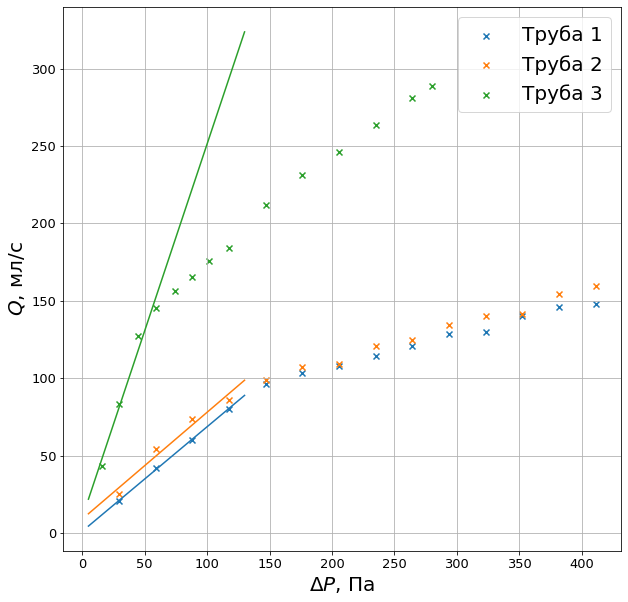

In [18]:
plt.rc('font', size = 13) 

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

const_start = 5
const_end   = 130
counter = 1

for data in data_list:
    ax.scatter (data.P, data.Q, marker = 'x', label = "Труба {num}".format (num = counter));
    ax.plot    ([const_start, const_end], [data.k * const_start + data.b, data.k * const_end + data.b]);
    counter += 1

""" ax.plot    ([const_start, const_end], [k1 * const_start + b1, k1 * const_end + b1], color = "red", label = "Эксперимент 1");
ax.scatter (data1.t[0:51], data1.lnP[0:51],     color = "red", marker = 'x');

ax.plot    ([const_start, const_end], [k2 * const_start + b2, k2 * const_end + b2], color = "blue", label = "Эксперимент 2");
ax.scatter (data2.t[0:51], data2.lnP[0:51],     color = "blue", marker = 'x');
 """

ax.set_xlabel('$\Delta P$, Па',  fontsize = 20)
ax.set_ylabel('$Q$, мл/c', fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/QP.pdf")

In [14]:
P = list (map (float, input("Введите P: ").split()))
x = list (map (float, input("Введите x: ").split()))

k2, b2, sigma_k2, sigma_b2 = MNK (x, P)

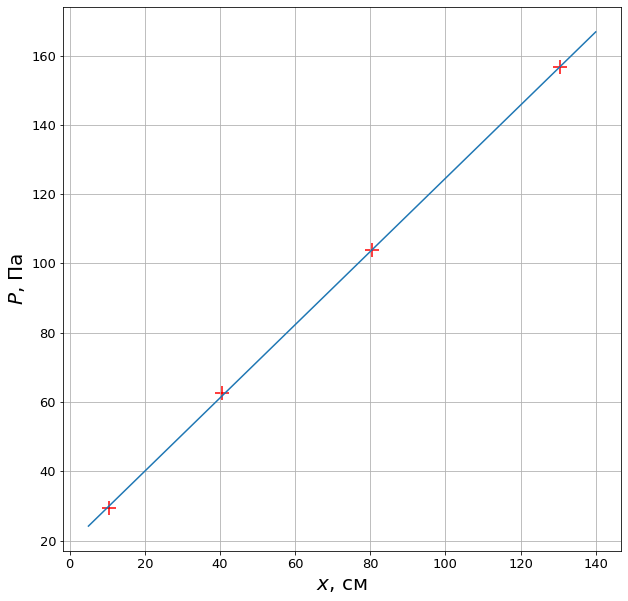

In [17]:
plt.rc('font', size = 13) 

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.plot ([5, 140], [k2*5+b2, k2*140+b2]);
ax.scatter (x, P, marker = '+', s = 200, color = "red");

ax.set_xlabel('$x$, см', fontsize = 20)
ax.set_ylabel('$P$, Па', fontsize = 20)

ax.grid(True)

plt.savefig ("Picturies/Px.pdf")

In [22]:
# Уж извините, можно и руками посчитать...
ln_Q = [4.264, 3.987, 5.169]
ln_R = [0.719, 0.405, 0.956]

k3, b3, sigma_k3, sigma_b3 = MNK (ln_R, ln_Q)
print (k3, sigma_k3)

2.0785682184106187 0.47673911241231426


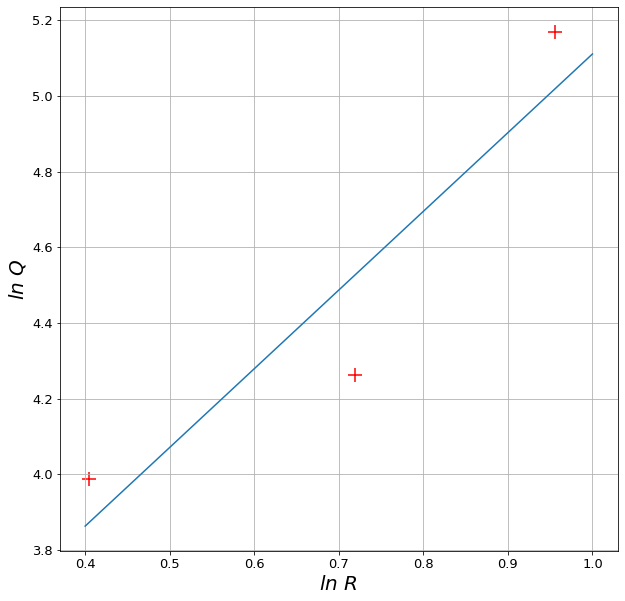

In [23]:
plt.rc('font', size = 13) 

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.plot ([0.4, 1], [k3*0.4+b3, k3*1+b3]);
ax.scatter (ln_R, ln_Q, marker = '+', s = 200, color = "red");

ax.set_xlabel('$ln ~R$',   fontsize = 20)
ax.set_ylabel('$ln ~Q$', fontsize = 20)

ax.grid(True)

plt.savefig ("Picturies/QR.pdf")